In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('tcc_ceds_music.csv')  

data.head().T

,0,1,2,3,4
Unnamed: 0,0,4,6,10,12
artist_name,mukesh,frankie laine,johnnie ray,pérez prado,giorgos papadopoulos
track_name,mohabbat bhi jhoothi,i believe,cry,patricia,apopse eida oneiro
release_date,1950,1950,1950,1950,1950
genre,pop,pop,pop,pop,pop
lyrics,hold time feel break feel untrue convince spea...,believe drop rain fall grow believe darkest ni...,sweetheart send letter goodbye secret feel bet...,kiss lips want stroll charm mambo chacha merin...,till darling till matter know till dream live ...
len,95,51,24,54,48
dating,0.000598,0.035537,0.00277,0.048249,0.00135
violence,0.063746,0.096777,0.00277,0.001548,0.00135
world/life,0.000598,0.443435,0.00277,0.001548,0.417772


In [3]:
data.shape

(28372, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64
 14  commun

In [5]:
data.isnull().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64

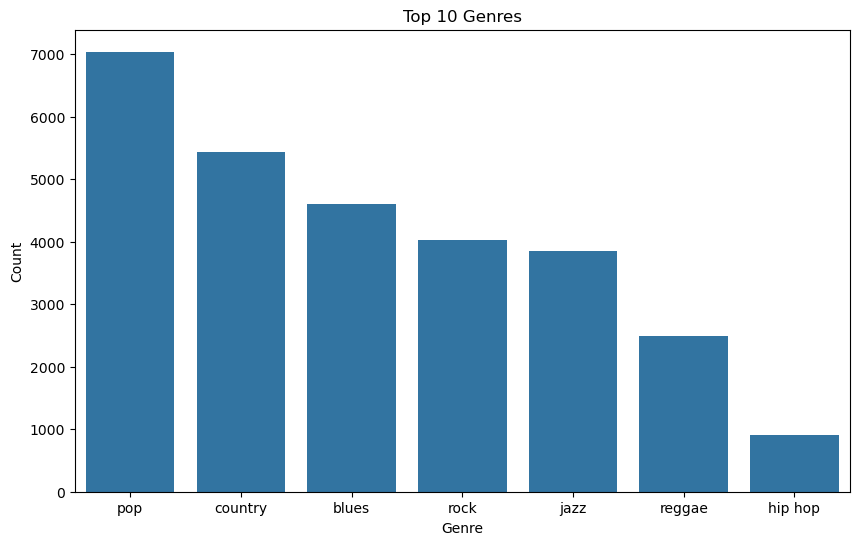

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=data, order=data['genre'].value_counts().index[:10])
plt.title('Top 10 Genres')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.show()

In [7]:
top_artists = data.groupby('artist_name').size().sort_values(ascending=False).head(10)
top_artists

artist_name
johnny cash        190
ella fitzgerald    188
dean martin        146
willie nelson      131
george jones       107
elvis presley       97
dolly parton        96
waylon jennings     95
george strait       92
nina simone         82
dtype: int64

C:\Users\Hp\AppData\Local\Temp\ipykernel_5004\2101936193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


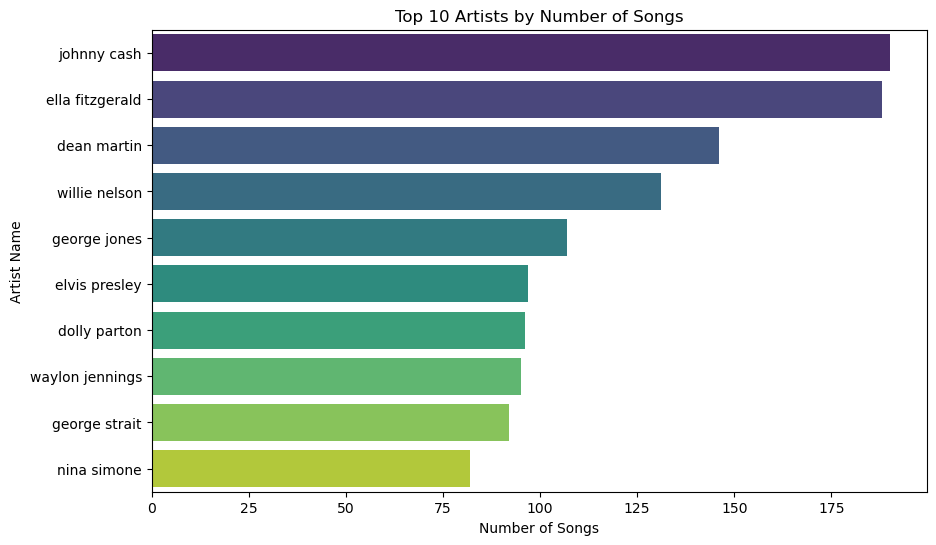

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.show()

In [9]:
data['combined_features'] = (
    data['genre'].fillna('') + ' ' +
    data['artist_name'].fillna('') + ' ' +
    data['track_name'].fillna('') + ' ' + data['topic'].fillna(''))

In [10]:
data['combined_features'][0]

'pop mukesh mohabbat bhi jhoothi sadness'

In [11]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

In [12]:
tfidf_matrix.toarray()[0][0]

0.0

In [13]:
tfidf_matrix

<28372x14091 sparse matrix of type '<class 'numpy.float64'>'
	with 166871 stored elements in Compressed Sparse Row format>

In [14]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [15]:
len(cosine_sim)

28372

In [16]:
cosine_sim[0]

array([1.        , 0.02029558, 0.02371704, ..., 0.        , 0.        ,
       0.        ])

In [17]:
song_title = 'cry'

In [18]:
idx = data[data['track_name'] == song_title].index
idx

Index([2, 426, 649, 4700, 14249, 20294], dtype='int64')

In [19]:
idx = idx[0]
idx

2

In [20]:
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores

[(0, 0.023717040481429884),
 (1, 0.03670734182562256),
 (2, 1.0),
 (3, 0.026249729081276207),
 (4, 0.020578555011616147),
 (5, 0.1355225434622542),
 (6, 0.025337966573492195),
 (7, 0.04096213005031397),
 (8, 0.01766944019156251),
 (9, 0.022262196966681323),
 (10, 0.018677739936954946),
 (11, 0.03203280516330648),
 (12, 0.028630176011303826),
 (13, 0.027701600762540284),
 (14, 0.03159357871109262),
 (15, 0.028699294652327918),
 (16, 0.10215666138152793),
 (17, 0.033513635248461036),
 (18, 0.024558787738802334),
 (19, 0.017160325093281772),
 (20, 0.017827655306060685),
 (21, 0.024075092729584),
 (22, 0.02383365727136152),
 (23, 0.0919648657652122),
 (24, 0.061202536811732385),
 (25, 0.01747554210936017),
 (26, 0.07461524626100802),
 (27, 0.024533385590429307),
 (28, 0.018639399935925925),
 (29, 0.017218872065155627),
 (30, 0.01739656384686139),
 (31, 0.016959171987482608),
 (32, 0.017315624814075333),
 (33, 0.021999611814387466),
 (34, 0.028353970336324398),
 (35, 0.10285445054558465),
 

In [21]:
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores

[(2, 1.0),
 (56, 0.9287819797541167),
 (15294, 0.4764363331397055),
 (12887, 0.4732628912506324),
 (4957, 0.44491492500770435),
 (12910, 0.4376898975043578),
 (14679, 0.4366879845914409),
 (14542, 0.42935785653994785),
 (7337, 0.42745835037046986),
 (13887, 0.42664905014169613),
 (14701, 0.41530227970827294),
 (5767, 0.4098087376995779),
 (12881, 0.4050708328119369),
 (13247, 0.3906177564444189),
 (12882, 0.37760951935250314),
 (12796, 0.36247747034410865),
 (5446, 0.356928391894471),
 (12340, 0.3527701464180277),
 (7360, 0.33828316737317826),
 (16454, 0.3348975030173772),
 (7681, 0.3337630681930564),
 (7728, 0.3337630681930564),
 (5462, 0.3186771474723077),
 (15751, 0.31862365333551573),
 (16481, 0.30824298149169205),
 (12800, 0.3063107782562804),
 (7178, 0.30116771458678365),
 (7683, 0.2899013855910757),
 (7375, 0.28750012567059924),
 (7114, 0.284850249046387),
 (7233, 0.2843366297062173),
 (4705, 0.28406272872952265),
 (7588, 0.2801058833048193),
 (18749, 0.2784865734455634),
 (7908

In [22]:
def get_recommendations(song_title, data, cosine_sim, top_n=10):
    # Get the index of the song that matches the title
    idx = data[data['track_name'] == song_title].index
    if len(idx) == 0:
        print("Song not found in the dataset.")
        return
    
    idx = idx[0]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:top_n+1]  
    song_indices = [i[0] for i in sim_scores]

    recommendations = data.iloc[song_indices]
    return recommendations

In [23]:
data[data['track_name'] == 'cry']['topic']

2           music
426         music
649      romantic
4700      sadness
14249     sadness
20294     sadness
Name: topic, dtype: object

In [24]:
recommended_songs = get_recommendations('cry', data, cosine_sim, top_n=10)
print(recommended_songs[['track_name', 'artist_name', 'genre', 'topic']])

                          track_name     artist_name    genre     topic
56                         here am i     johnnie ray      pop   sadness
15294              too many memories  johnnie taylor    blues  violence
12887             keep on loving you  johnnie taylor    blues  romantic
4957                  when it's over       sugar ray      pop     music
12910            music, music, music     ray charles    blues     music
14679                         lately  johnnie taylor    blues   sadness
14542  there's nothing i wouldn't do  johnnie taylor    blues  feelings
7337                      until then       ray price  country     music
13887                     steal away  johnnie taylor    blues   sadness
14701             don't make me late  johnnie taylor    blues   obscene


C:\Users\Hp\AppData\Local\Temp\ipykernel_5004\269018342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='track_name', x='artist_name', data=recommended_songs, palette='coolwarm')


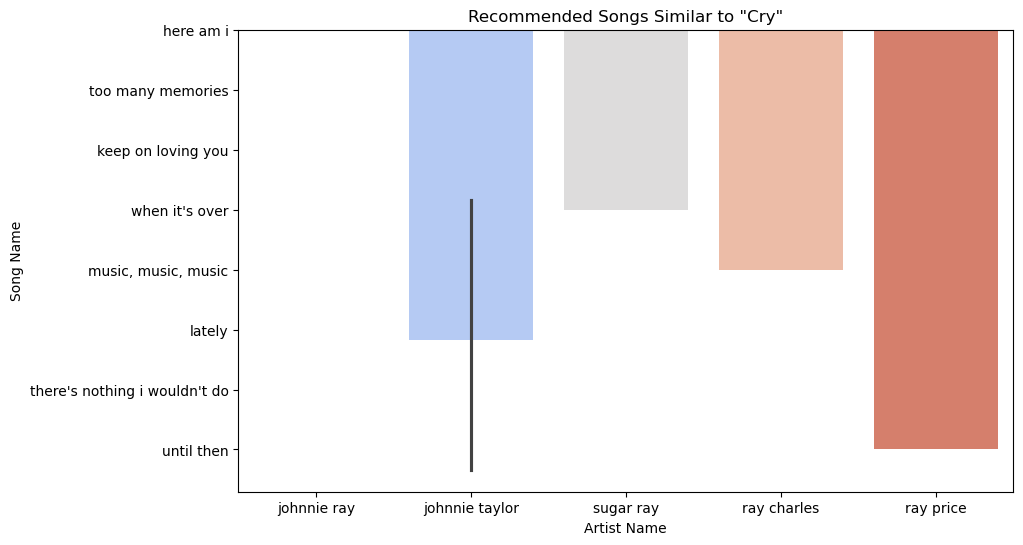

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(y='track_name', x='artist_name', data=recommended_songs, palette='coolwarm')
plt.title('Recommended Songs Similar to "Cry"')
plt.xlabel('Artist Name')
plt.ylabel('Song Name')
plt.show()